In [1]:
# Packages :
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read Data :

data = pd.read_csv('online_retail.csv')

In [5]:
data.head(3)

InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                 WHITE METAL LANTERN         6   
2    536365    84406B      CREAM CUPID HEARTS COAT HANGER         8   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2022-12-01 08:26:00       2.75     17850.0  United Kingdom

# Step 1 : Dataset Collection and understanding :

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
data.shape

(541909, 8)

In [12]:
data.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

## Calc.Duplicates

In [15]:
data.duplicated().sum()

5268

In [16]:
data.drop_duplicates(inplace=True )

In [17]:
data.shape

(536641, 8)

## Calc. Missing Values

In [20]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [21]:
data.dropna(inplace=True)

In [25]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [26]:
data.shape

(401604, 8)

# Step 2 : Data Preprocessing : 

## Remove negative or zero quantities and prices

In [29]:
data['Quantity'].min()

-80995

In [30]:
data['Quantity'].max()

80995

In [31]:
data['UnitPrice'].min()

0.0

In [32]:
data['UnitPrice'].max()

38970.0

In [33]:
data.loc[data['UnitPrice']<= 0]

InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
285657    561916         M                               Manual         1   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
358655    568158      PADS           PADS TO MATCH ALL CUSHIONS         1   
361825    568384         M                               Manual         1   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
395529    571035         M                               Manual         1   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
436961    574252         M                               Manual         1   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
479546    577168         M                               Manual         1   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
485985    577696         M                               Manual         1   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

                InvoiceDate  UnitPrice  CustomerID         Country  
9302    2022-12-05 14:02:00        0.0     12647.0         Germany  
33576   2022-12-16 14:36:00        0.0     16560.0  United Kingdom  
40089   2022-12-21 13:45:00        0.0     14911.0            EIRE  
47068   2023-01-06 16:41:00        0.0     13081.0  United Kingdom  
47070   2023-01-06 16:41:00        0.0     13081.0  United Kingdom  
56674   2023-01-13 15:10:00        0.0     15107.0  United Kingdom  
86789   2023-02-10 13:08:00        0.0     17560.0  United Kingdom  
130188  2023-03-23 10:25:00        0.0     13239.0  United Kingdom  
139453  2023-03-30 12:45:00        0.0     13113.0  United Kingdom  
145208  2023-04-04 14:42:00        0.0     14410.0  United Kingdom  
157042  2023-04-14 18:57:00        0.0     12457.0     Switzerland  
187613  2023-05-12 15

In [34]:
data.loc[data['Quantity']<= 0]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate  UnitPrice  CustomerID         Country  
141     2022-12-01 09:41:00      27.50     14527.0  United Kingdom  
154     2022-12-01 09:49:00       4.65     15311.0  United Kingdom  
235     2022-12-01 10:24:00       1.65     17548.0  United Kingdom  
236     2022-12-01 10:24:00       0.29     17548.0  United Kingdom  
237     2022-12-01 10:24:00       0.29     17548.0  United Kingdom  
...                     ...        ...         ...             ...  
540449  2023-12-09 09:57:00       0.83     14397.0  United Kingdom  
541541  2023-12-09 10:28:00     224.69     15498.0  United Kingdom  
541715  2023-12-09 11:57:00      10.95     15311.0  United Kingdom  
541716  2023-12-09 11:58:00       1.25     17315.0  United Kingdom  
541717  2023-12-09 11:58:00       1.25     17315.0  United Kingdom  

[8872 rows x 8 columns]

In [35]:
data.drop(data[data['UnitPrice']<= 0].index, inplace=True)

In [36]:
data.drop(data[data['Quantity']<= 0].index, inplace=True)

In [37]:
data.shape

(392692, 8)

In [38]:
data['InvoiceNo'] = data['InvoiceNo'].astype(int)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    392692 non-null  int32  
 1   StockCode    392692 non-null  object 
 2   Description  392692 non-null  object 
 3   Quantity     392692 non-null  int64  
 4   InvoiceDate  392692 non-null  object 
 5   UnitPrice    392692 non-null  float64
 6   CustomerID   392692 non-null  float64
 7   Country      392692 non-null  object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 25.5+ MB


# Step 3 : Exploratory Data Analysis (EDA) : 

### ● Analyze transaction volume by country

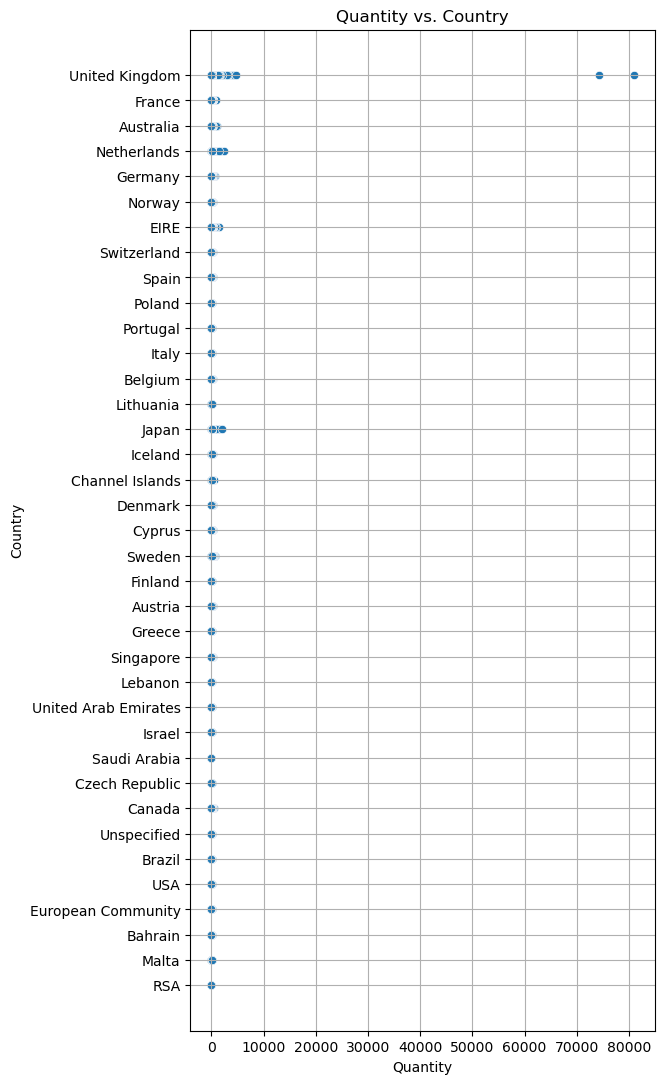

In [42]:
plt.figure(figsize=(6,13))
sns.scatterplot(x='Quantity', y='Country', data=data)
plt.title('Quantity vs. Country')
plt.grid(True)
plt.show()

### ● Visualize purchase trends over time 

In [44]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

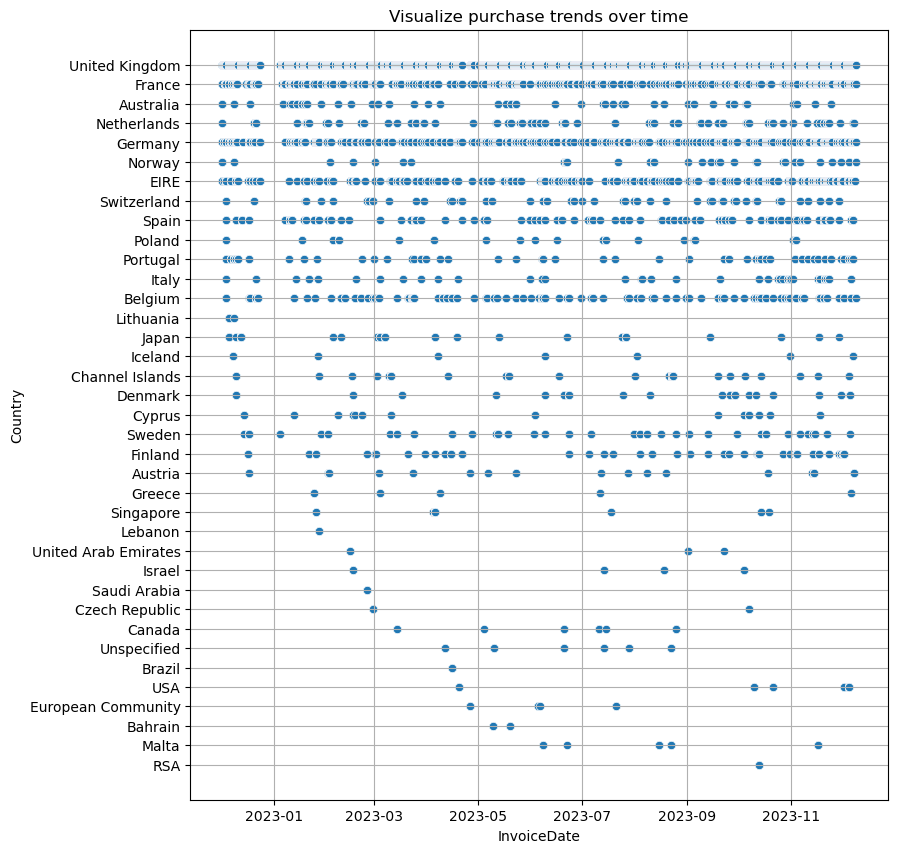

In [45]:
plt.figure(figsize=(9, 10))
sns.scatterplot(x='InvoiceDate', y='Country', data=data)
plt.title('Visualize purchase trends over time')
plt.grid(True)
plt.show()

### ● Identify top-selling products 

In [47]:
d1 = data.groupby(['Description'])['UnitPrice'].sum().sort_values(ascending=False).head(10)

In [48]:
d1.values

array([49775.31, 34695.96, 21383.2 , 11906.36,  6773.07,  6668.  ,
        5831.82,  5706.59,  5691.31,  5636.03])

In [49]:
fig = px.pie(
    values = d1.values,
    names = d1.index,
    width = 1000,
    height = 500,
    hole = 0.5
)

fig.show()

### ● Visualize purchase trends over time 

In [51]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2022-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2022-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2022-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2022-12-01 08:26:00       3.39     17850.0  United Kingdom

In [52]:
data['total_price'] = data['Quantity'] * data['UnitPrice']

In [53]:


### Date Wise ...



In [54]:
daily_sales = data.groupby(data['InvoiceDate'].dt.date)['total_price'].sum()

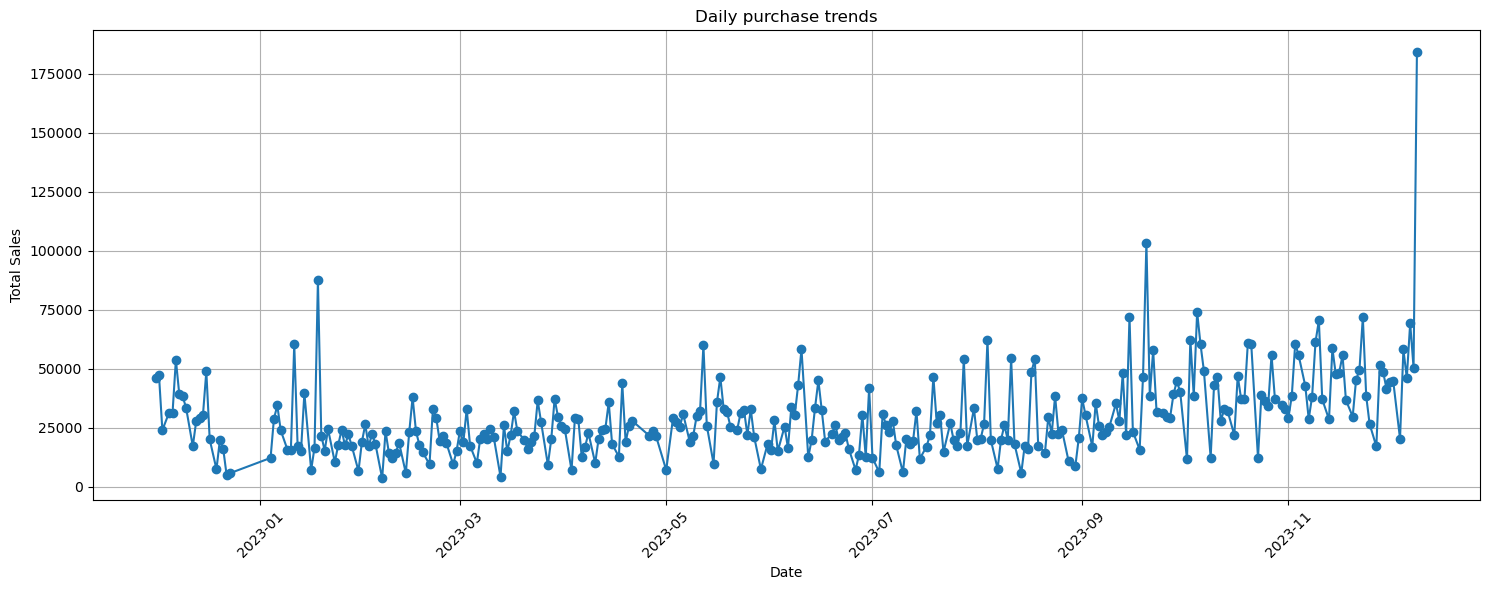

In [55]:
plt.figure(figsize=(15, 6))
daily_sales.plot(kind='line', marker='o')
plt.title('Daily purchase trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

In [56]:


### Month Wise ...



In [57]:
daily_sales1 = data.groupby(data['InvoiceDate'].dt.to_period('M'))['total_price'].sum()

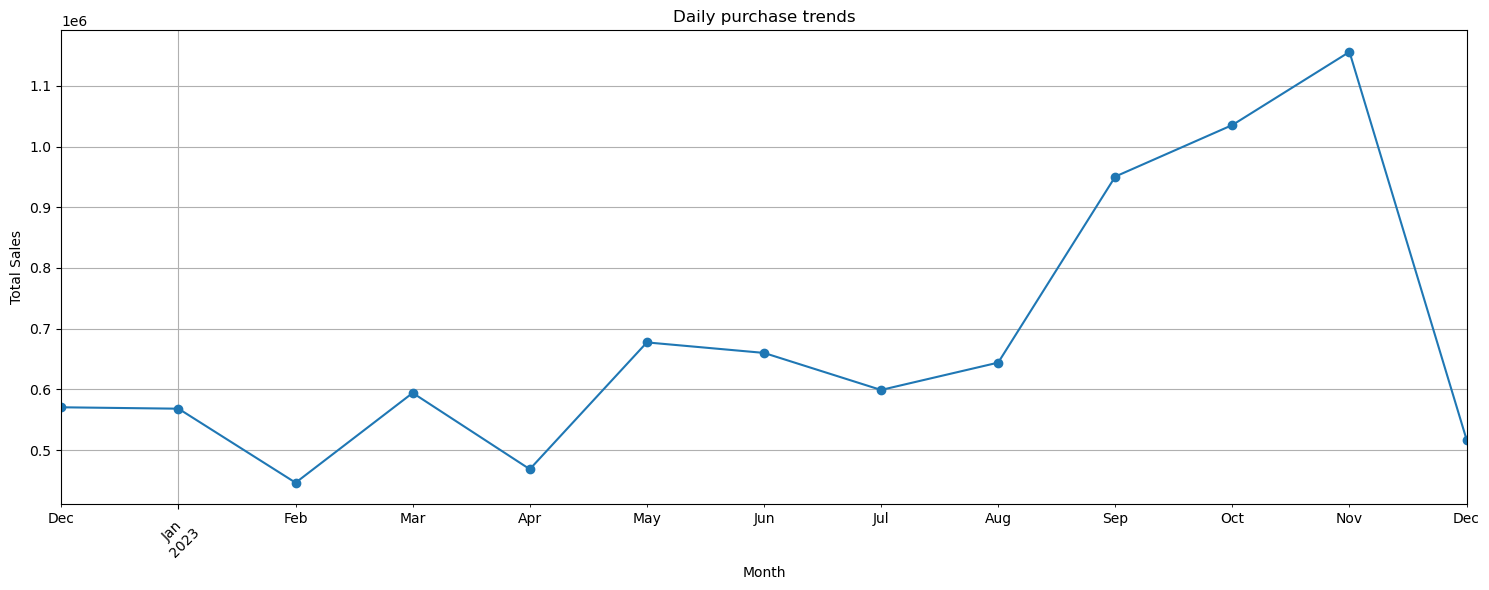

In [58]:
plt.figure(figsize=(15, 6))
daily_sales1.plot(kind='line', marker='o')
plt.title('Daily purchase trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### ● Inspect monetary distribution per transaction and customer 

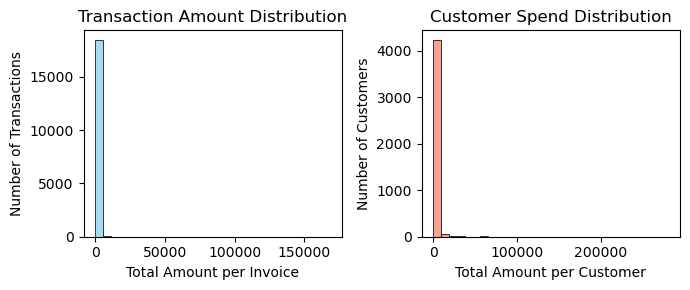

In [60]:
# 1. Distribution per Transaction
# ----------------------------

# Group by InvoiceNo
invoice_totals = data.groupby('InvoiceNo')['total_price'].sum()

# 2. Distribution per Customer
# ----------------------------

# Group by CustomerID
customer_totals = data.groupby('CustomerID')['total_price'].sum()


# Plotting
# ----------------------------

plt.figure(figsize=(7, 3))

# Left Plot: Invoice Total Distribution
plt.subplot(1, 2, 1)
sns.histplot(invoice_totals, bins=30, color='skyblue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Total Amount per Invoice')
plt.ylabel('Number of Transactions')

# Right Plot: Customer Total Distribution
plt.subplot(1, 2, 2)
sns.histplot(customer_totals, bins=30, color='salmon')
plt.title('Customer Spend Distribution')
plt.xlabel('Total Amount per Customer')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()

### ● RFM distributions

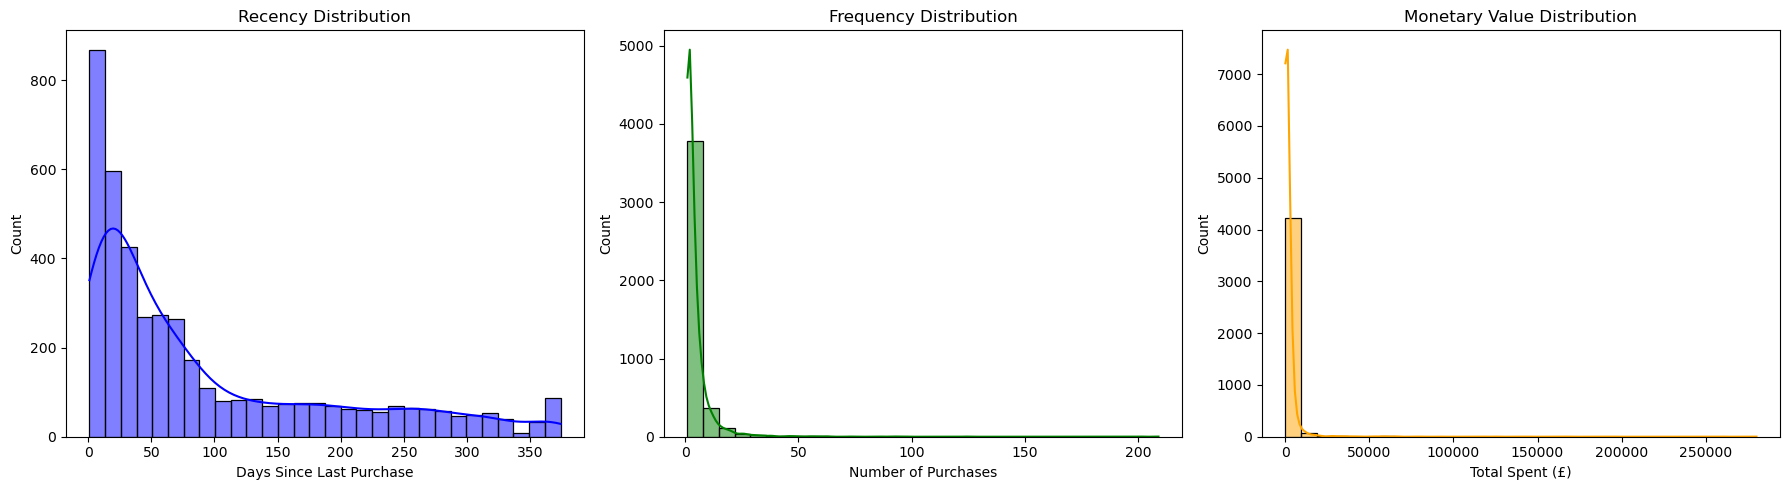

In [62]:
# Set snapshot date as the day after the last transaction
snapshot_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

# Calculate RFM
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                   # Frequency
    'total_price': 'sum'                                       # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# -------------------------
# Plot RFM Distributions
# -------------------------
plt.figure(figsize=(18, 5))

# Recency
plt.subplot(1, 3, 1)
sns.histplot(rfm['Recency'], bins=30, kde=True, color='blue')
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')

# Frequency
plt.subplot(1, 3, 2)
sns.histplot(rfm['Frequency'], bins=30, kde=True, color='green')
plt.title('Frequency Distribution')
plt.xlabel('Number of Purchases')

# Monetary
plt.subplot(1, 3, 3)
sns.histplot(rfm['Monetary'], bins=30, kde=True, color='orange')
plt.title('Monetary Value Distribution')
plt.xlabel('Total Spent (£)')

plt.tight_layout()
plt.show()



### ● Elbow curve for cluster selection 

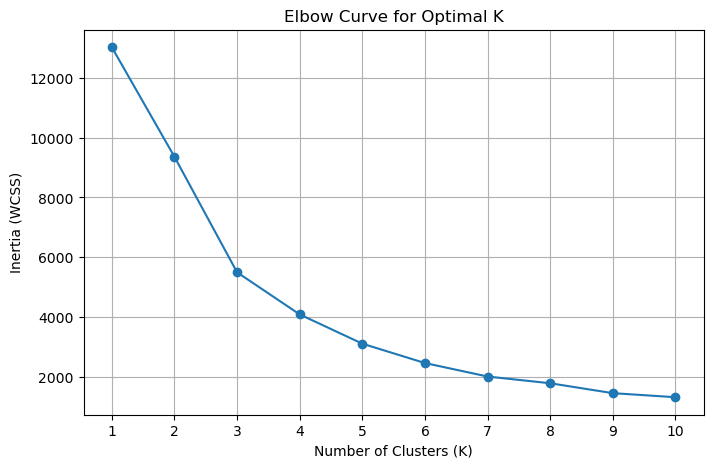

In [78]:
# Normalize RFM values
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Run KMeans for K from 1 to 10
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_normalized)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.grid(True)
plt.xticks(K_range)
plt.show()

### ● Customer cluster profiles 

In [80]:
# Normalize
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Apply KMeans clustering 
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

# ---------------------------
# Cluster Profile Summary
# ---------------------------
cluster_profile = rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_profile['Count'] = rfm['Cluster'].value_counts().sort_index()
print(cluster_profile)

         Recency  Frequency  Monetary  Count
Cluster                                     
0           43.7        3.7    1353.6   3054
1          248.1        1.6     478.8   1067
2            7.4       82.5  127188.0     13
3           15.5       22.3   12690.5    204


In [81]:
cluster_profile['Segment Label'] = ['Regular','At-Risk', 'High Value', 'Occational']

In [82]:
cluster_profile

Recency  Frequency  Monetary  Count Segment Label
Cluster                                                   
0           43.7        3.7    1353.6   3054       Regular
1          248.1        1.6     478.8   1067       At-Risk
2            7.4       82.5  127188.0     13    High Value
3           15.5       22.3   12690.5    204    Occational

### ● Product recommendation heatmap / similarity matrix

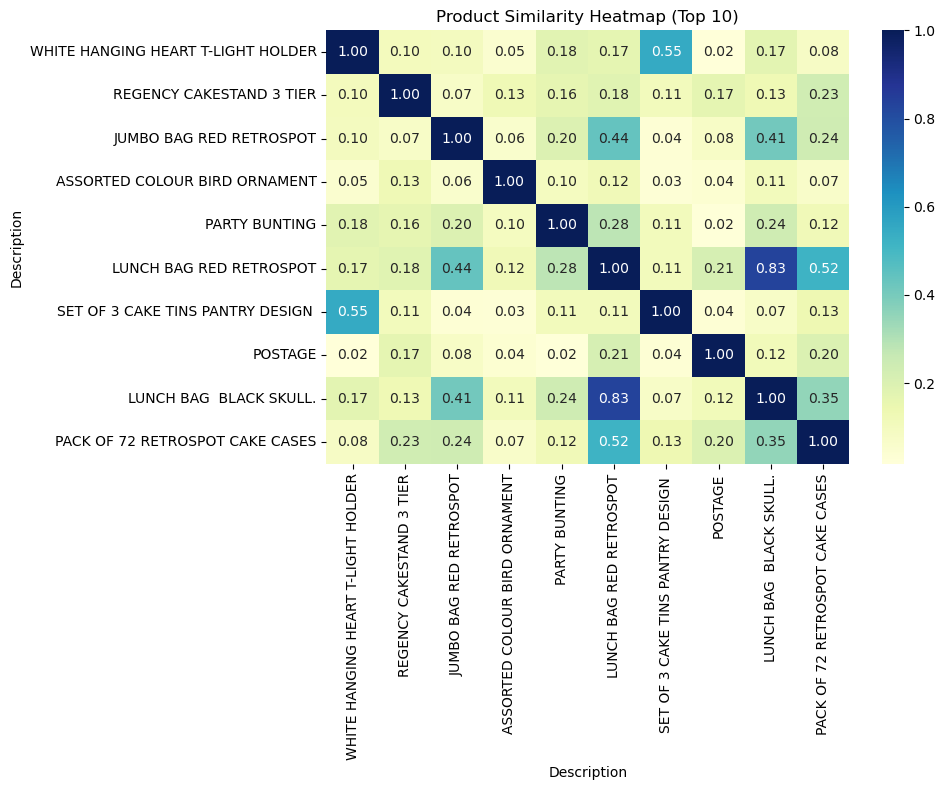

In [86]:
# Create a customer-product quantity matrix
product_matrix = data.pivot_table(index='CustomerID', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

# Compute cosine similarity between products
product_similarity = cosine_similarity(product_matrix.T)
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=product_matrix.columns,
                                     columns=product_matrix.columns)

# Plot heatmap for a sample of top 10 products
top_products = data['Description'].value_counts().head(10).index
plt.figure(figsize=(10, 8))
sns.heatmap(product_similarity_df.loc[top_products, top_products], cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Product Similarity Heatmap (Top 10)')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 4 : Clustering Methodology : 

In [107]:
data1 = data.copy()

In [109]:
data = data1

In [111]:
rfm2 = rfm.copy()

In [113]:
rfm.head()

CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          1  77183.60        3
1     12347.0        2          7   4310.00        0
2     12348.0       75          4   1797.24        0
3     12349.0       19          1   1757.55        0
4     12350.0      310          1    334.40        1

In [115]:
rfm1 = rfm.copy()

In [117]:
rfm1[['Norm_Recency','Norm_Frequency','Norm_Monetary']] = rfm_scaled

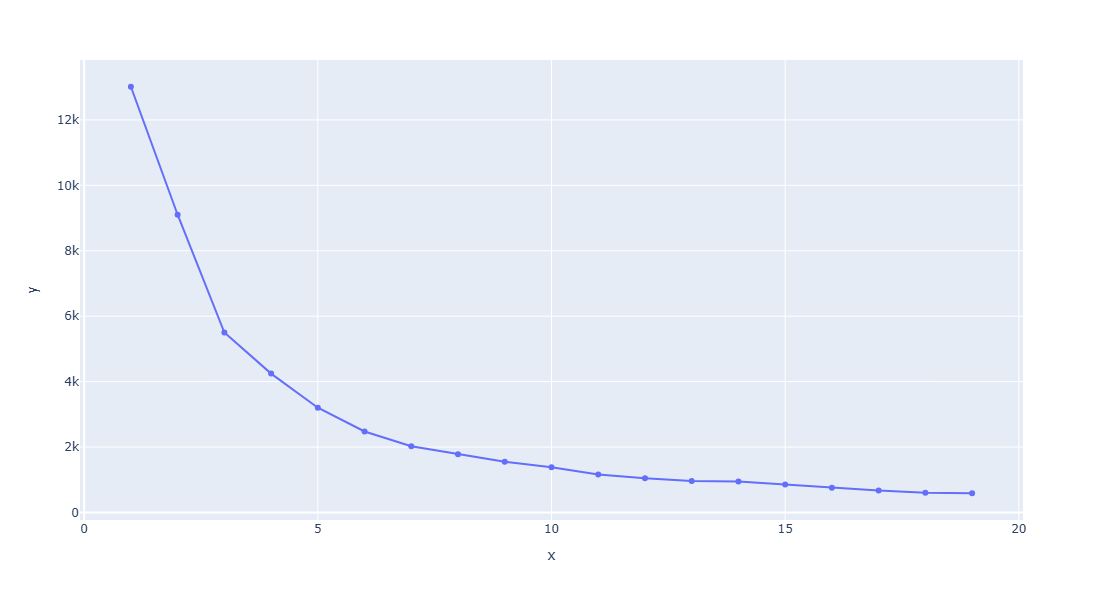

In [119]:
# Elbow Method :

k = range (1, 20)
inertia = []
# Run KMeans for K from 1 to 10

for i in k:
    km = KMeans(n_clusters= i)
    km.fit(rfm_normalized)
    inertia.append(km.inertia_)
    labels = kmeans.labels_

px.line(
    x=k,
    y=inertia,
    width=600,
    height=600,
    markers = True
)

In [121]:
# Fixing K value from elbow :

k = 5

# Model Building : 

model = KMeans(n_clusters=k)
model.fit(rfm_normalized)

KMeans(n_clusters=5)

In [141]:
labels = kmeans.labels_

In [123]:
pred_cls = model.predict(rfm_normalized)

In [125]:
pred_cls

array([2, 0, 0, ..., 0, 0, 0])

In [127]:
rfm_new = pd.DataFrame(rfm_normalized,columns=["Recency","Frequency","Monetary"])

In [129]:
rfm_new['predicted_cluster'] = pred_cls

In [131]:
rfm_new.head(5)

Recency  Frequency  Monetary  predicted_cluster
0  2.334574  -0.425097  8.363010                  2
1 -0.905340   0.354417  0.251699                  0
2 -0.175360  -0.035340 -0.027988                  0
3 -0.735345  -0.425097 -0.032406                  0
4  2.174578  -0.425097 -0.190812                  1

In [133]:
rfm.head()

CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          1  77183.60        3
1     12347.0        2          7   4310.00        0
2     12348.0       75          4   1797.24        0
3     12349.0       19          1   1757.55        0
4     12350.0      310          1    334.40        1

In [148]:
# Evaluation
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(rfm_normalized, labels)
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.62


In [150]:
# print(f"Inertia (WCSS): {kmeans.inertia_:.2f}")

###  Silhouette Score: 0.62

This is Reasonable structure (range is from -1 to 1):

0.5 – 0.7 → Reasonable structure


In [153]:
# Cluster Profile Summary
# ---------------------------
cluster_profile = rfm_new.groupby('predicted_cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_profile['Count'] = rfm_new['predicted_cluster'].value_counts().sort_index()
print(cluster_profile)

                   Recency  Frequency  Monetary  Count
predicted_cluster                                     
0                     -0.5       -0.1      -0.1   3107
1                      1.6       -0.4      -0.2   1071
2                     -0.8        2.9       1.6    151
3                     -0.9       22.6       7.8      3
4                     -0.8        5.0      21.0      6


In [155]:
cluster_profile['Segment Label'] = ['Regular','At-Risk','Occational','High Value','High Value']

In [157]:
cluster_profile

Recency  Frequency  Monetary  Count Segment Label
predicted_cluster                                                   
0                     -0.5       -0.1      -0.1   3107       Regular
1                      1.6       -0.4      -0.2   1071       At-Risk
2                     -0.8        2.9       1.6    151    Occational
3                     -0.9       22.6       7.8      3    High Value
4                     -0.8        5.0      21.0      6    High Value

### Cluster Segment Reason

    0 Regular Recency OK, frequency and monetary low, but the largest group.
    1 At-Risk Very high recency = inactive, and low frequency + monetary.
    2 Occasional Low recency, decent frequency and moderate spend.
    3 High Value Best in all 3 metrics, though very small group.
    4 High Value Excellent monetary & good frequency/recency — fits with cluster 3.

✅ Since Clusters 3 and 4 both represent very High Value customers, you can merge them into one High Value segment.

## Visualize the clusters using a scatter plot of RFM scores.

In [160]:
rfm2.head()

CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          1  77183.60        3
1     12347.0        2          7   4310.00        0
2     12348.0       75          4   1797.24        0
3     12349.0       19          1   1757.55        0
4     12350.0      310          1    334.40        1

In [162]:
import pickle

with open ('rfm.pkl','wb') as f:
    pickle.dump(rfm2,f)


In [164]:
# Normalize
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm2[['Recency', 'Frequency', 'Monetary']])

# Apply KMeans clustering 
kmeans = KMeans(n_clusters=4, random_state=42)
rfm2['Cluster'] = kmeans.fit_predict(rfm_scaled)

# ---------------------------
# Cluster Profile Summary
# ---------------------------
cluster_profile2 = rfm2.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(1)
cluster_profile2['Count'] = rfm2['Cluster'].value_counts().sort_index()
print(cluster_profile2)

         Recency  Frequency  Monetary  Count
Cluster                                     
0           43.7        3.7    1353.6   3054
1          248.1        1.6     478.8   1067
2            7.4       82.5  127188.0     13
3           15.5       22.3   12690.5    204


In [166]:
cluster_profile2['Segment Label'] = ['Regular','At-Risk', 'High Value', 'Occational']

In [168]:
cluster_profile2

Recency  Frequency  Monetary  Count Segment Label
Cluster                                                   
0           43.7        3.7    1353.6   3054       Regular
1          248.1        1.6     478.8   1067       At-Risk
2            7.4       82.5  127188.0     13    High Value
3           15.5       22.3   12690.5    204    Occational

In [170]:
cluster_labels2 = {
    0: 'Regular',
    1: 'At-Risk',
    2: 'High-Value',
    3: 'Occational' 
}

rfm2['Segment'] = rfm2['Cluster'].map(cluster_labels2)

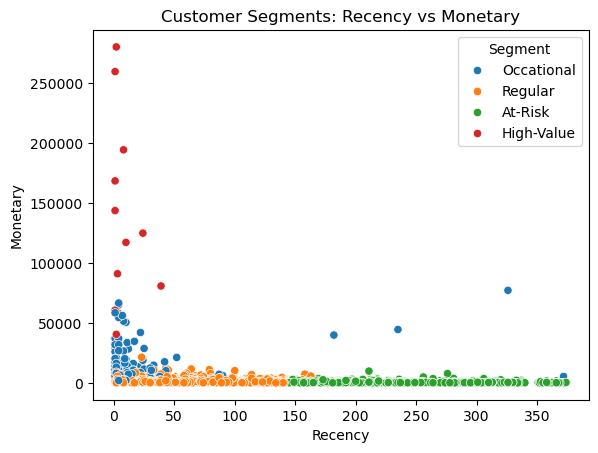

In [172]:
# Visualize Clusters


# Visualize clusters by RFM
sns.scatterplot(data=rfm2, x='Recency', y='Monetary', hue='Segment', palette='tab10')
plt.title("Customer Segments: Recency vs Monetary")
plt.show()

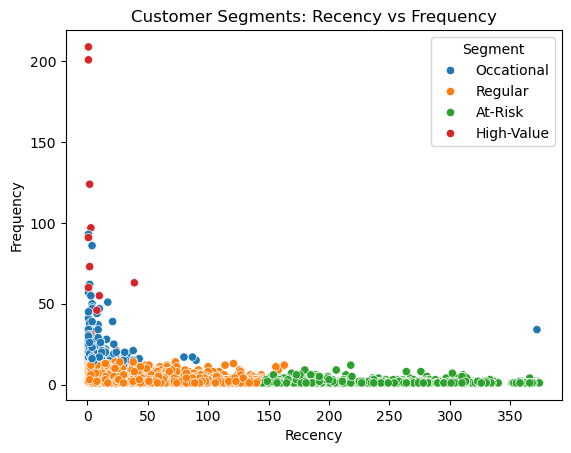

In [173]:
# Visualize clusters by RFM
sns.scatterplot(data=rfm2, x='Recency', y='Frequency', hue='Segment', palette='tab10')
plt.title("Customer Segments: Recency vs Frequency")
plt.show()

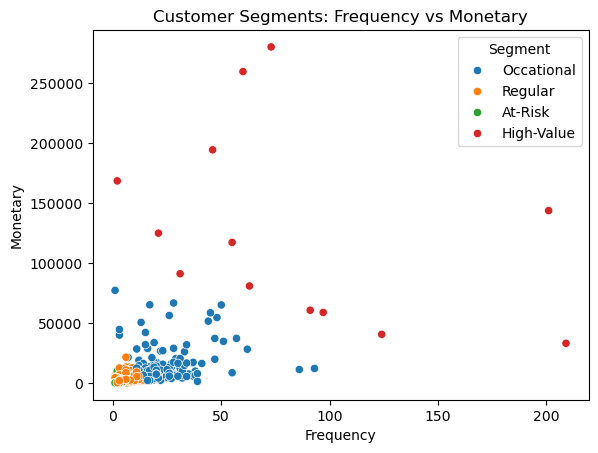

In [174]:
# Visualize clusters by RFM
sns.scatterplot(data=rfm2, x='Frequency', y='Monetary', hue='Segment', palette='tab10')
plt.title("Customer Segments: Frequency vs Monetary")
plt.show()

# Step 5 :  Recommendation System Approach :

In [177]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'total_price'],
      dtype='object')

In [181]:
# Create a mapping dictionary
stockcode_to_name = data[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()

from sklearn.metrics.pairwise import cosine_similarity

# Example: customer-item matrix (binary or count-based)
item_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)

# Transpose for item-to-item similarity
item_sim = cosine_similarity(item_matrix.T)
item_sim_df = pd.DataFrame(item_sim, index=item_matrix.columns, columns=item_matrix.columns)

def get_similar_products(stock_code, top_n=5):
    similar_codes = item_sim_df[stock_code].sort_values(ascending=False).iloc[1:top_n+1]
    result = [(code, stockcode_to_name.get(code, 'Unknown')) for code in similar_codes.index]
    return result

In [182]:
get_similar_products('85123A')

[('21175', 'GIN AND TONIC DIET METAL SIGN'),
 ('21733', 'RED HANGING HEART T-LIGHT HOLDER'),
 ('82552', 'WASHROOM METAL SIGN'),
 ('82551', 'LAUNDRY 15C METAL SIGN'),
 ('23288', 'GREEN VINTAGE SPOT BEAKER')]

In [402]:
data.to_csv("data_clean.csv",index=False)

# Step 6 : Stream Lit :

In [185]:
import pickle

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

with open ('rfm_scaled.pkl','wb') as e:
    pickle.dump(scaler,e)

print(type(scaler))




<class 'sklearn.preprocessing._data.StandardScaler'>


In [187]:
with open ('model.pkl','wb') as d:
    pickle.dump(model,d)

In [189]:
with open("model.pkl", "rb") as e:
    kmeans = pickle.load(e)

In [191]:
kmeans

KMeans(n_clusters=5)

In [193]:
%%writefile Project4.py
import streamlit as st
import pickle
import pandas as pd
import numpy as np
import time

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import LabelEncoder

import base64
# Function to load and encode local jpg image
def get_base64_of_bin_file(bin_file):
    with open(bin_file, 'rb') as f:
        data = f.read()
    return base64.b64encode(data).decode()

# Local image filename (same folder)
image_file = 'asa.jpg'

# Get base64 string
img_base64 = get_base64_of_bin_file(image_file)

# Inject HTML + CSS for background
page_bg_img = f"""
<style>
.stApp {{
  background-image: url("data:image/jpg;base64,{img_base64}");
  background-size: cover;
  background-repeat: no-repeat;
  background-attachment: fixed;
}}
</style>
"""

# Load CSS
st.markdown(page_bg_img, unsafe_allow_html=True)

# Sidebar for navigation
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Project Introduction", "Clustering", "Recommendation", "Creator Info"])


# -------------------------------- PAGE 1: Introduction --------------------------------
if page == "Project Introduction":
    st.title("🛒 Shopper Spectrum: Customer Segmentation and Product Recommendations in E-Commerce ")
    st.write("\n")
    st.write("\n")
    st.write(""" 
    ##### The global e-commerce industry generates vast amounts of transaction data daily, offering 
##### valuable insights into customer purchasing behaviors. Analyzing this data is essential for 
##### identifying meaningful customer segments and recommending relevant products to enhance 
##### customer experience and drive business growth. """)
    st.write("\n")
    st.write("\n")

    st.markdown("""\n
    ### Real-time Business Use Cases:  \n
        ● Customer Segmentation for Targeted Marketing Campaigns \n
        ● Personalized Product Recommendations on E-Commerce Platforms \n
        ● Identifying At-Risk Customers for Retention Programs \n
        ● Dynamic Pricing Strategies Based on Purchase Behavior \n
        ● Inventory Management and Stock Optimization Based on Customer Demand Patterns  """)

    st.markdown("""
     ### Problem Type: \n
        ● Unsupervised Machine Learning – Clustering \n
        ● Collaborative Filtering – Recommendation System """)
        
    #st.image(r'C:\Users\91968\OneDrive\Desktop\Pthon DS GuVi\Project\Project2\images (11).jpeg', width=152)

# -------------------------------- PAGE 2: Clustering --------------------------------
elif page == "Clustering":
    st.title("🧠 Customer Segmentation")
    st.write("\n")

    # Load the scaler used for RFM normalization
    with open("rfm_scaled.pkl", "rb") as f:
        scaler = pickle.load(f)
    with open("model.pkl", "rb") as e:
        kmeans = pickle.load(e)

    # Define your segment labels
    segment_labels = {
        0: "At-Risk",
        1: "Occational",
        2: "High-Value",
        3: "High Value",
        4: "Regular"
    }

    st.markdown("""
    Enter **Recency**, **Frequency**, and **Monetary** values to predict the customer segment.
    """)
    st.write("\n")
    c1,c2,c3 = st.columns([1,1,1], gap = 'large')

    # Input fields
    with c1 :
        recency = st.number_input("**Recency (days since last purchase)**", min_value=0)
    with c2 :
        frequency = st.number_input("**Frequency (number of purchases)**", min_value=0)
    with c3 :
        monetary = st.number_input("**Monetary (total spending)**", min_value=0.0, step=10.0)

    # Prediction
    if st.button("Predict Segment"):
        # Ensure input is in correct 2D format
        rfm1 = np.array([[recency, frequency, monetary]])
        rfm_scaled = scaler.transform(rfm1)
        cluster = kmeans.predict(rfm_scaled)[0]
        segment = segment_labels.get(cluster, "Unknown")

        st.success(f"Cluster is : **{cluster}**")

        st.success(f"The predicted customer segment is :  **{segment}**")

# -------------------------------- PAGE 3: Recommendation --------------------------------

elif page == "Recommendation":
    st.title("📋 Product Recommendation")
    data = pd.read_csv('data_clean.csv')


    # Create a mapping dictionary
    stockcode_to_name = data[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()
    
    from sklearn.metrics.pairwise import cosine_similarity
    
    # Example: customer-item matrix (binary or count-based)
    item_matrix = data.pivot_table(index='CustomerID', columns='StockCode', values='Quantity', aggfunc='sum', fill_value=0)
    
    # Transpose for item-to-item similarity
    item_sim = cosine_similarity(item_matrix.T)
    item_sim_df = pd.DataFrame(item_sim, index=item_matrix.columns, columns=item_matrix.columns)
    
    def get_similar_products(stock_code, top_n=5):
        similar_codes = item_sim_df[stock_code].sort_values(ascending=False).iloc[1:top_n+1]
        result = [(code, stockcode_to_name.get(code, 'Unknown')) for code in similar_codes.index]
        return result
        
    st.markdown("Enter a **Product StockCode** to get top 5 similar products (based on customer purchase history).")

    stock_code_input = st.text_input("Enter StockCode (e.g., 85123A) : ")
   
    if st.button("Get Recommendations"):
        if stock_code_input.strip() == "":
            st.warning("Please enter a valid StockCode.")
        elif stock_code_input not in item_sim_df.index:
            st.error("StockCode not found in data.")
        else:
            top_n = 5
            similar_products = get_similar_products(stock_code_input, top_n=top_n)

            st.markdown(f"### 🔎 Top {top_n} recommendations for StockCode: `{stock_code_input}`")
            for i, (code, name) in enumerate(similar_products, 1):
                st.write(f"{i}. { name } (StockCode: `{code}`)")
                
# -------------------------------- PAGE 4: Creator Info --------------------------------

elif page == "Creator Info":
    st.title("👨‍💻 Creator of this Project")
    st.write("""
#    **Developed by:** Sudharsan M S
#    **Skills:** 
## Python,   
## Machine Learning,   
## Streamlit
    """)
    st.image('aa.jpg', width=150)


  

Overwriting Project4.py


In [195]:
data

InvoiceNo StockCode                          Description  Quantity  \
0          536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365     71053                  WHITE METAL LANTERN         6   
2          536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...       ...                                  ...       ...   
541904     581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906     581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  total_price  
0      2022-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30  
1      2022-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
2      2022-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00  
3      2022-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
4      2022-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34  
...                    ...        ...         ...             ...          ...  
541904 2023-12-09 12:50:00       0.85     12680.0          France        10.20  
541905 2023-12-09 12:50:00       2.10     12680.0          France        12.60  
541906 2023-12-09 12:50:00       4.15     12680.0          France        16.60  
541907 2023-12-09 12:50:00       4.15     12680.0          France        16.60  
541908 2023-12-09 12:50:00       4.95     12680.0          France        14.85  

[392692 rows x 9 columns]